<a href="https://colab.research.google.com/github/LoicSteve/data-science-portfolio/blob/main/data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [3]:
df.tail()

,date,state,fips,cases,deaths
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485
61941,2023-03-23,Wyoming,56,185800,2014


In [7]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [8]:
df.shape

(61942, 5)

## EDA

*Find characteristics of data*

In [11]:
df.describe()

,fips,cases,deaths
count,61942.000000,6.194200e+04,61942.000000
mean,32.247958,8.898301e+05,11779.067499
std,18.788383,1.470231e+06,17345.774849
min,1.000000,1.000000e+00,0.000000
25%,17.000000,7.078350e+04,1171.000000
50%,31.000000,3.514960e+05,5035.000000
75%,46.000000,1.043231e+06,14912.000000
max,78.000000,1.216916e+07,104277.000000


*Cases and Deaths in the USA due to Covid-19*

<Axes: xlabel='cases', ylabel='deaths'>

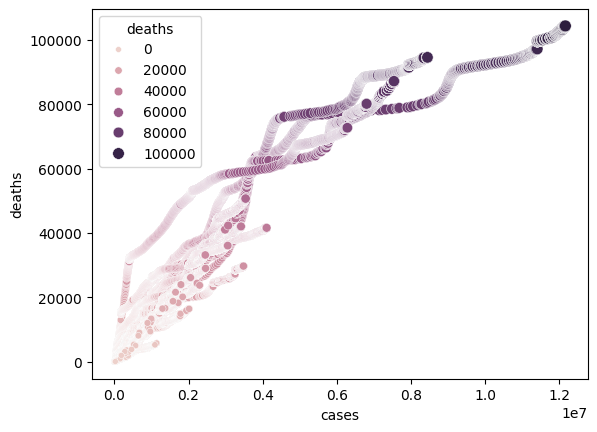

In [12]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths",
                hue="deaths",size="deaths", data=df)

### Date-based EDA

*Dealing with dates by setting index*

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23'],
              dtype='datetime64[ns]', name='date', length=61942, freq=None)

*Filter results by date range*

In [24]:
from datetime import date, timedelta
today = date(2022, 1, 22)
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2022-01-22
Two days ago 2022-01-20


In [25]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2022-01-20,Alabama,1,1104356,16792
2022-01-20,Alaska,2,187655,1027
2022-01-20,American Samoa,60,18,0
2022-01-20,Arizona,4,1683915,25429
2022-01-20,Arkansas,5,713643,9470


*Sort DataFrame in place by states with highest deaths and cases and show first 10 results*

In [26]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2022-01-22,California,6,7660930,78775
2022-01-21,California,6,7621774,78700
2022-01-20,California,6,7487212,78529
2022-01-22,Texas,48,5876122,78326
2022-01-21,Texas,48,5813105,78171
2022-01-20,Texas,48,5746859,77986
2022-01-22,Florida,12,5303818,63763
2022-01-21,Florida,12,5281000,63763
2022-01-20,Florida,12,5242386,63569


In [27]:
current_df.shape

(168, 4)

### State Based Analysis

*Get 10 states and subset*

In [28]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['California',
 'California',
 'California',
 'Texas',
 'Texas',
 'Texas',
 'Florida',
 'Florida',
 'Florida',
 'New York']

In [29]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

*Verify the unique states left is the same 10*

In [30]:
set(top_states_df.state.values)

{'California', 'Florida', 'New York', 'Texas'}

<Figure size 1500x500 with 0 Axes>

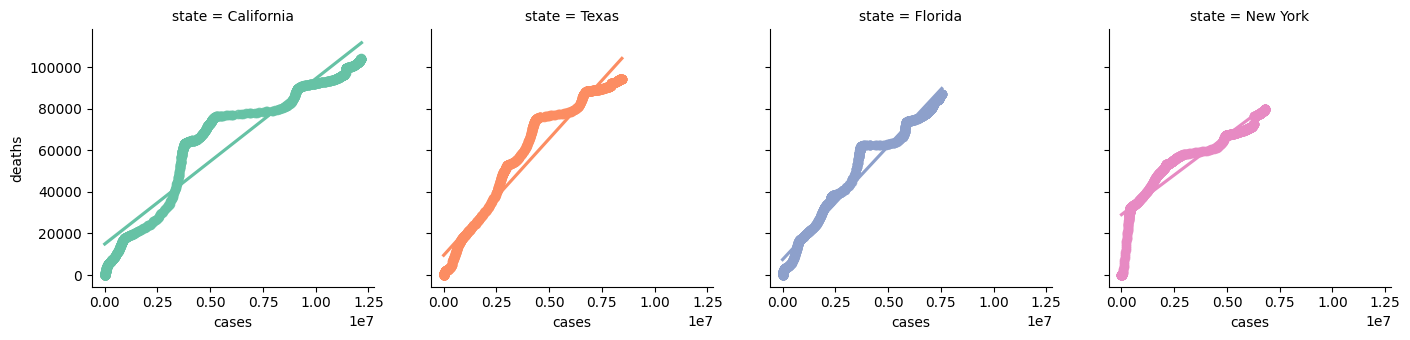

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state",
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

*Interactive plot of top states*

In [33]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-08,Texas,23,0
2020-03-09,Texas,24,0
2020-03-10,Texas,31,0
2020-03-11,Texas,33,0
2020-03-12,Texas,41,0


In [34]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_march_current_df, x=top_states_march_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

### Search for Features: Political, Health and Finance

*Sugar Intake By State*

In [36]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)


## Modeling

## Conclusion